In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
os.listdir(r'D:\Downloads\Datasets')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
uber_15=pd.read_csv(r'D:\Downloads\Datasets/uber-raw-data-janjune-15_sample.csv')

In [6]:
uber_15.shape


(100000, 4)

In [7]:
type(uber_15)

pandas.core.frame.DataFrame

In [8]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
uber_15.duplicated().sum()

54

In [10]:
uber_15.drop_duplicates(inplace=True)

In [11]:
uber_15.duplicated().sum()

0

In [12]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 99946, dtype: bool

In [13]:
uber_15.shape

(99946, 4)

In [14]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [15]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [16]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [17]:
type(uber_15['Pickup_date'][0])

str

In [18]:
pd.to_datetime(uber_15['Pickup_date'])

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

In [19]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'])

In [20]:
(uber_15['Pickup_date']).dtype

dtype('<M8[ns]')

In [21]:
 uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [22]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [24]:
uber_15['month']=uber_15['Pickup_date'].dt.month_name()

In [25]:
uber_15['month'].value_counts()

month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

<Axes: xlabel='month'>

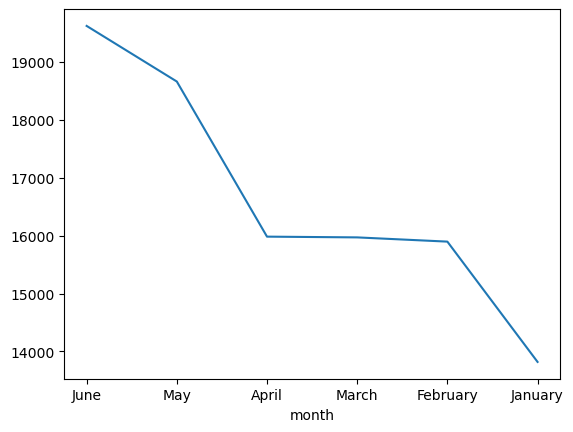

In [26]:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

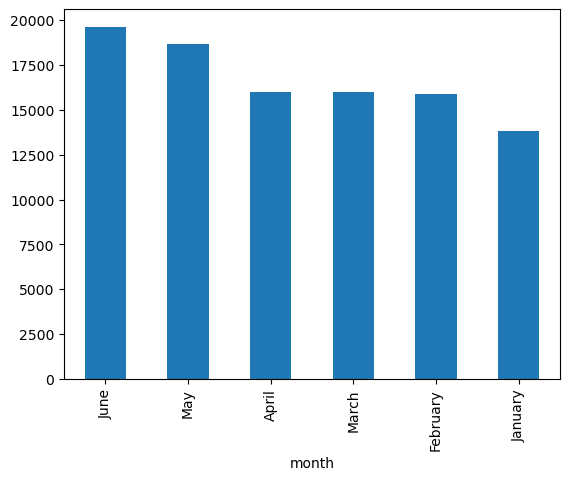

In [27]:
uber_15['month'].value_counts().plot(kind='bar')

In [28]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March


In [29]:
uber_15['month']=uber_15['Pickup_date'].dt.month_name()
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [30]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [31]:
pivot=pd.crosstab(index=uber_15['month'],columns=uber_15['weekday'])

<Axes: xlabel='month'>

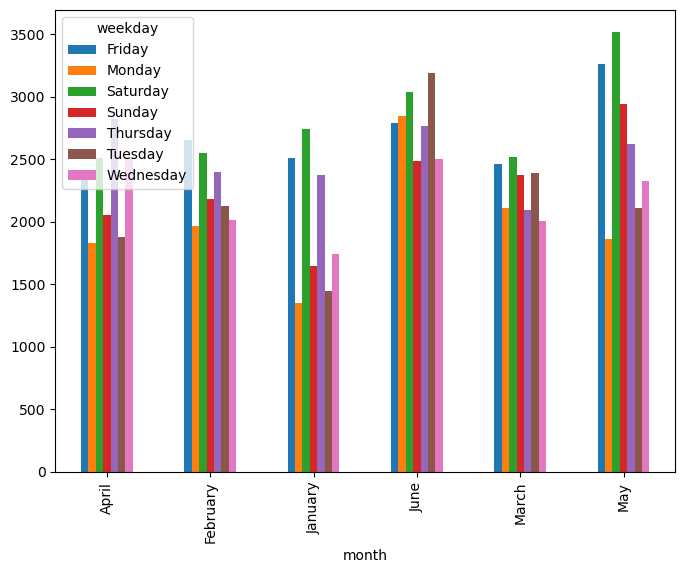

In [32]:
pivot.plot(kind='bar',figsize=(8,6))

In [33]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [34]:
uber_15.groupby(['weekday','hour'], as_index='False').size()

weekday    hour
Friday     0        581
           1        333
           2        197
           3        138
           4        161
                   ... 
Wednesday  19      1044
           20       897
           21       949
           22       900
           23       669
Length: 168, dtype: int64

In [35]:
summary = uber_15.groupby(['weekday', 'hour']).size().reset_index(name='size')


In [36]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: >

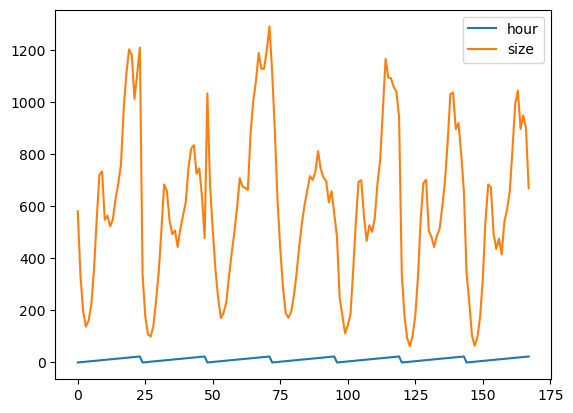

In [37]:
summary.plot()

<Axes: xlabel='hour', ylabel='size'>

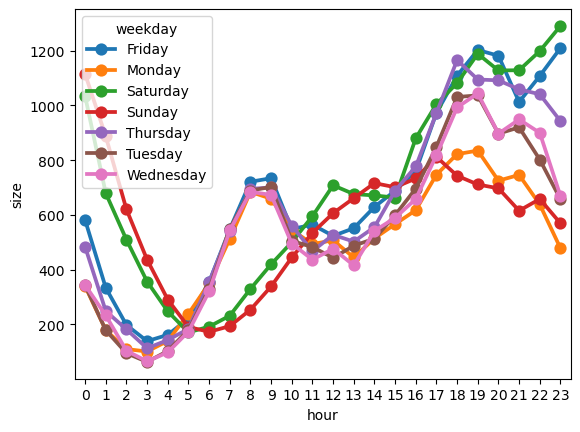

In [38]:
sns.pointplot(x="hour",y="size",hue="weekday",data=summary)

In [39]:
print(summary.head())

  weekday  hour  size
0  Friday     0   581
1  Friday     1   333
2  Friday     2   197
3  Friday     3   138
4  Friday     4   161


<Axes: xlabel='hour', ylabel='size'>

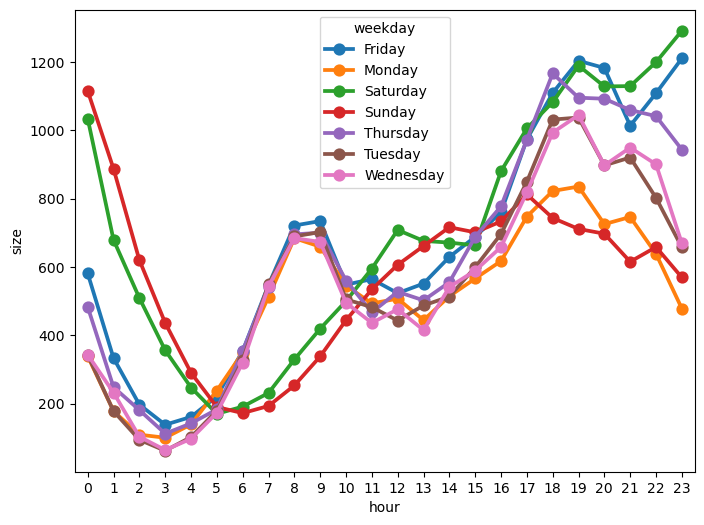

In [40]:
plt.figure(figsize=(8,6))
sns.pointplot(x="hour",y="size",hue="weekday",data=summary)

In [41]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [42]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [43]:
os.listdir(r'D:\Downloads\Datasets')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [44]:
uber_foil=pd.read_csv(r'D:\Downloads\Datasets/Uber-Jan-Feb-FOIL.csv')

In [45]:
uber_foil.shape

(354, 4)

In [46]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [47]:
!pip install chart_studio
!pip install plotly

In [48]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [49]:
init_notebook_mode(connected=True)

In [50]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [51]:
px.box(x='dispatching_base_number',y='active_vehicles' ,data_frame=uber_foil)